In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from glob import glob
from astropy.stats import LombScargle
from scipy import stats
import warnings
from TESStools import *
import celerite
from celerite import terms
from scipy.optimize import minimize

In [2]:
tics = [389437365,389565293]

f_Ny = 322.76203971547, f_R = 0.017787932748165886
10
Found 14 frequencies
10 unique frequencies
0.0002050778687574204
HD 270046
[[ 0.03864776  0.03864776  0.03864776]
 [ 0.26646463  0.30727002  0.38422638]
 [ 7.          8.         10.        ]]
[[0.07243476]
 [0.03864776]
 [0.11054852]]
f_Ny = 324.59880106819276, f_R = 0.03586727083626439
Found 7 frequencies
6 unique frequencies
0.00013655039658738114
HD 270111
[[0.13690821 0.13690821 0.20720738]
 [0.41136823 1.1022075  0.41136823]
 [3.         8.         2.        ]]
[]


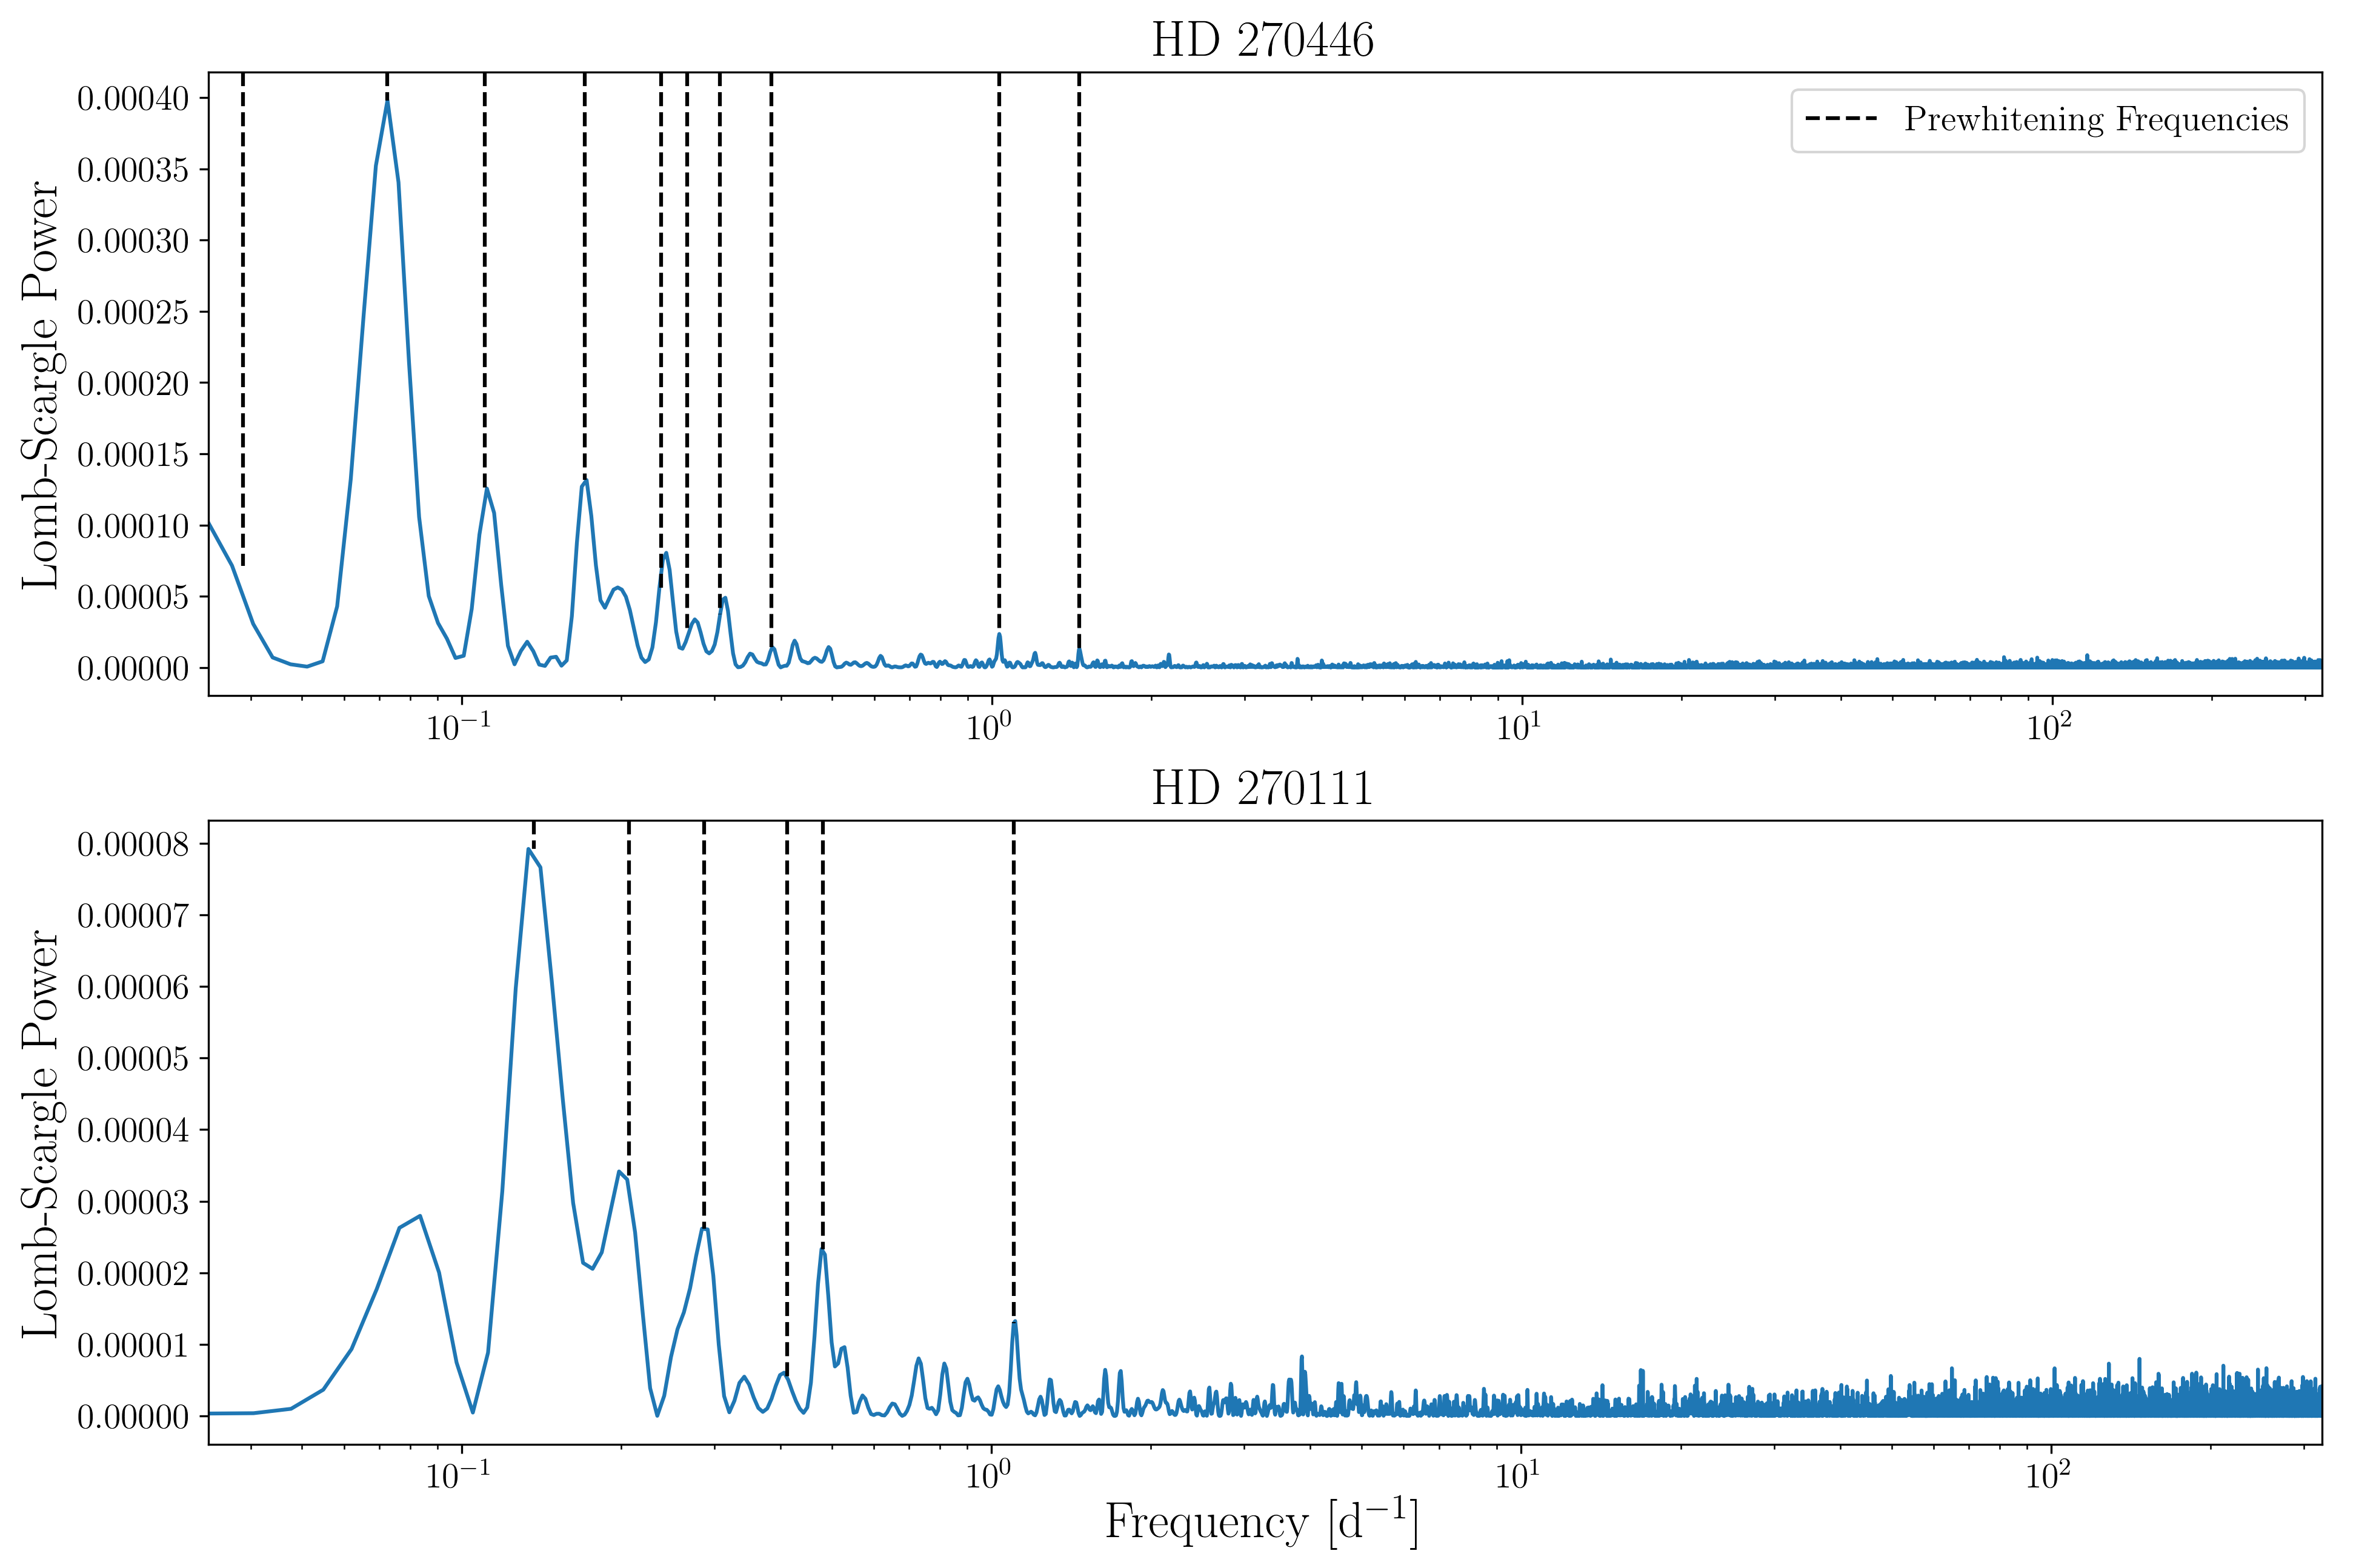

In [3]:
fig, ax = plt.subplots(2, figsize=(15,10),dpi=300)

for i,tic in enumerate(tics):
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)

    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    pseudo_NF = 0.5 / (np.mean(np.diff(time)))
    ls = LombScargle(time, flux, normalization='psd')
    freq, power = ls.autopower(minimum_frequency=1.0/30.0,
                        maximum_frequency=pseudo_NF)

    good_fs, good_amps, good_phases = prewhiten(time, flux, err)
    print(max(good_amps[:,0]))
    harmonics = harmonic_search(good_fs)
    print(['HD 270046','HD 270111'][i])
    print(harmonics)
    combos = combo_search(good_fs)
    print(combos)
    
    ax[i].plot(freq, power)

    ax[i].set(xscale='log', xlim=(1/30,pseudo_NF), ylabel='Lomb-Scargle Power')
    
    ylim = ax[i].get_ylim()

    ax[i].plot([good_fs[0,0],good_fs[0,0]],[ylim[1],power[np.argmin(np.abs(freq-good_fs[0,0]))]],c='k',ls='--',label='Prewhitening Frequencies')
    for f in good_fs[1:,0]:
        ax[i].plot([f,f],[ylim[1],power[np.argmin(np.abs(freq-f))]],c='k',ls='--')
        

    ax[i].set(ylim=ylim)
    
ax[0].legend(fontsize=14)

    
#fig.tight_layout()

labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
labax.set(xlabel='Frequency [d$^{-1}$]')
labax.set_zorder(-1)
    
for a in ax:
    a.yaxis.label.set_size(20)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
labax.xaxis.label.set_size(20)

#fig.tight_layout()
        
ax[0].set_title('HD 270446',fontsize=20)
ax[1].set_title('HD 270111',fontsize=20)
plt.savefig('../plots/OtherYSGs_period.pdf')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'HD 270111')

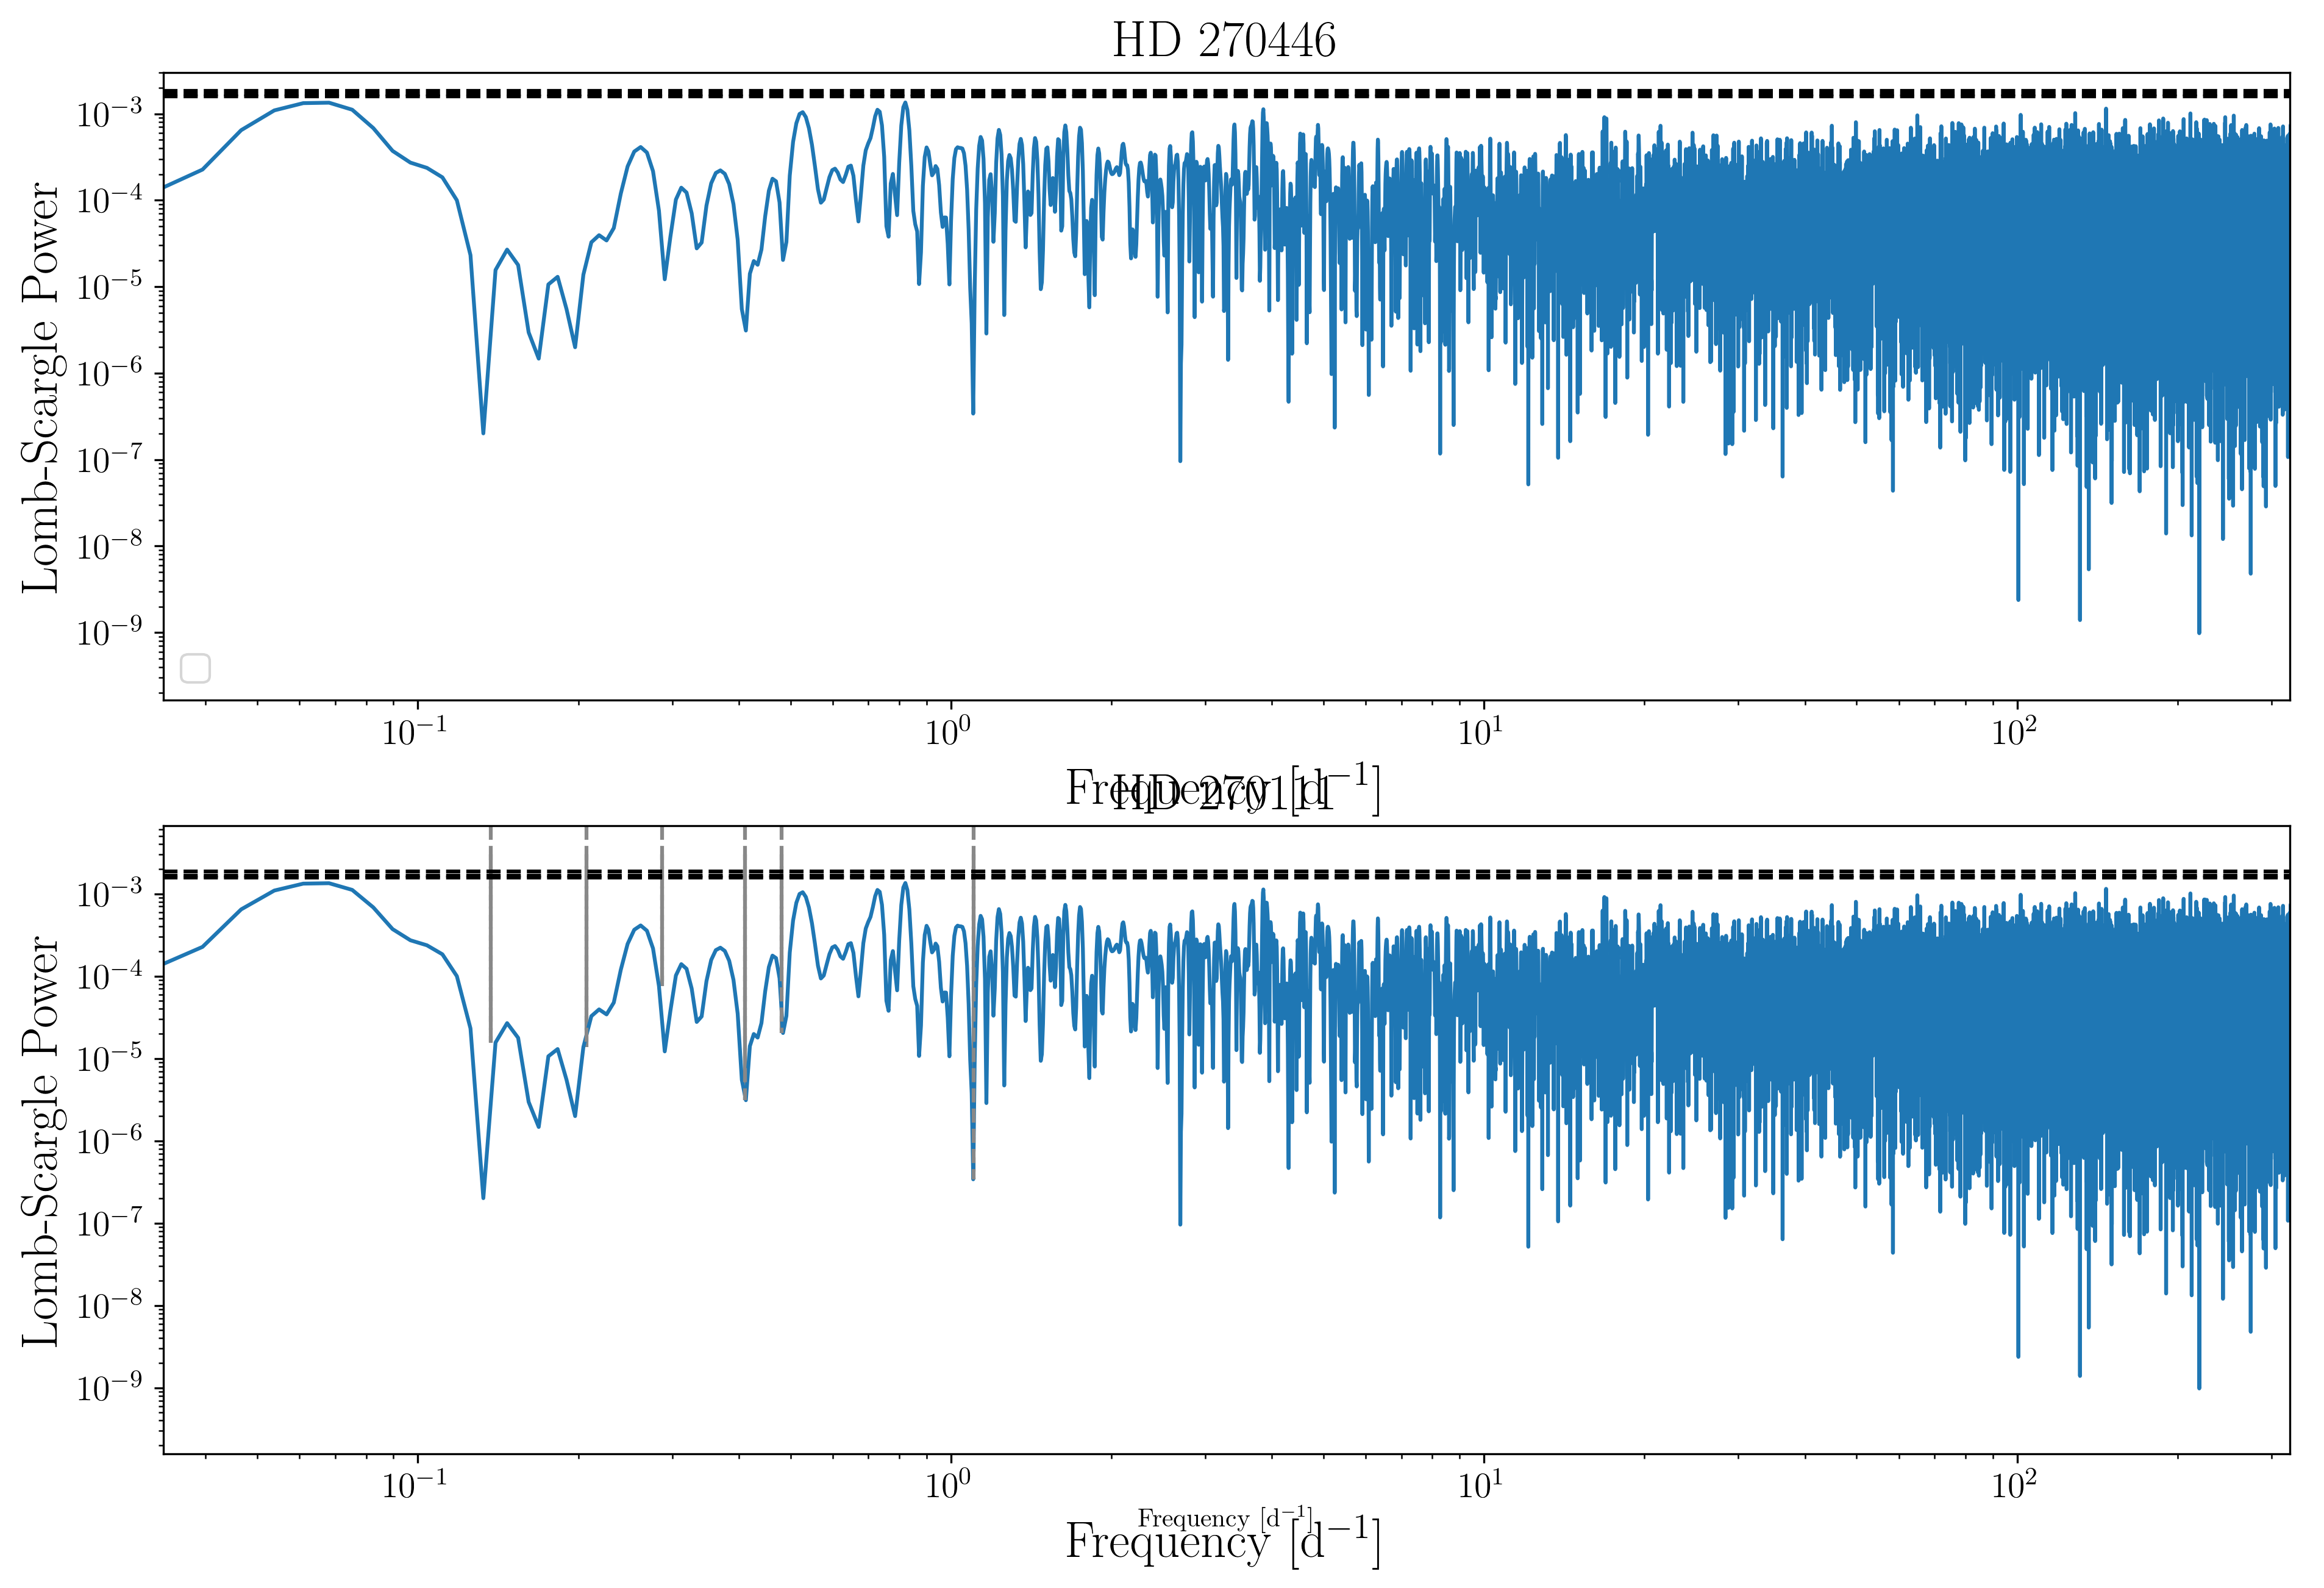

In [7]:
fig, axes = plt.subplots(2, figsize=(15,10),dpi=300)

for i,tic in enumerate(tics):
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)

    ls = LombScargle(time, flux)
    freq, power = ls.autopower() 

    ax = axes[i]
    ax.loglog(freq, power)

    ax.set(xlabel='Frequency [d$^{-1}$]',ylabel='Lomb-Scargle Power', xlim=(1/30,pseudo_NF))

    ylim = ax.get_ylim()

    plt.plot([good_fs[0,0],good_fs[0,0]],[ylim[1],power[np.argmin(np.abs(freq-good_fs[0,0]))]],c='#888888',ls='--',label='Prewhitening Frequencies')
    for f in good_fs[1:,0]:
        plt.plot([f,f],[ylim[1],power[np.argmin(np.abs(freq-f))]],c='#888888',ls='--')

    
    ax.set(ylim=ylim)

    probabilities = [0.1, 0.05, 0.01]
    fal = ls.false_alarm_level(probabilities)
    for f in fal:
        ax.axhline(y=f,c='k',ls='--')

    #plt.legend(loc=1, framealpha=0.9, prop={'size': 14})

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)

    
#fig.tight_layout()

labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
labax.set(xlabel='Frequency [d$^{-1}$]')
labax.set_zorder(-1)

#fig.tight_layout()
        
axes[0].set_title('HD 270446',fontsize=20)
axes[1].set_title('HD 270111',fontsize=20)
